In [2]:
import cv2
import numpy as np
# from PyQt5.QtWidgets import QApplication, QWidget, QPushButton, QVBoxLayout, QLabel, QInputDialog, QLineEdit
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, optimizers, models, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import optimizers
import numpy as np
# from tensorflow.keras.layers.core import Lambda
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import regularizers

In [3]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

170500096/170498071 [==============================] - 2s 0us/step


In [4]:
weight_decay = 0.0005
nb_epoch=20
batch_size=32
learning_rate = 0.001

In [5]:
#layer1 32*32*3
model = keras.Sequential()
model.add(Conv2D(64, (3, 3), padding='same',
input_shape=(32,32,3),kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
#layer2 32*32*64
model.add(Conv2D(64, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#layer3 16*16*64
model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
#layer4 16*16*128
model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#layer5 8*8*128
model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
#layer6 8*8*256
model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
#layer7 8*8*256
model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#layer8 4*4*256
model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
#layer9 4*4*512
model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
#layer10 4*4*512
model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#layer11 2*2*512
model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
#layer12 2*2*512
model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
#layer13 2*2*512
model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
#layer14 1*1*512
model.add(Flatten())
model.add(Dense(512,kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
#layer15 512
model.add(Dense(512,kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
#layer16 512
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

In [6]:
sgd = SGD(lr=learning_rate, decay=1e-6, momentum=0.9, nesterov=True)

In [7]:
model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])

In [8]:
history = model.fit(x_train,y_train,epochs=nb_epoch, batch_size=batch_size, validation_split=0.1, verbose=1)

Epoch 1/20
1407/1407 [==============================] - 49s 35ms/step - loss: 4.9297 - accuracy: 0.2061 - val_loss: 4.4548 - val_accuracy: 0.2824
Epoch 2/20
1407/1407 [==============================] - 50s 35ms/step - loss: 4.3010 - accuracy: 0.3113 - val_loss: 4.3251 - val_accuracy: 0.2988
Epoch 3/20
1407/1407 [==============================] - 49s 35ms/step - loss: 4.0618 - accuracy: 0.3915 - val_loss: 4.0938 - val_accuracy: 0.3634
Epoch 4/20
1407/1407 [==============================] - 50s 35ms/step - loss: 3.8592 - accuracy: 0.4531 - val_loss: 3.7479 - val_accuracy: 0.4690
Epoch 5/20
1407/1407 [==============================] - 49s 35ms/step - loss: 3.6759 - accuracy: 0.5043 - val_loss: 3.6109 - val_accuracy: 0.5300
Epoch 6/20
1407/1407 [==============================] - 49s 35ms/step - loss: 3.5149 - accuracy: 0.5455 - val_loss: 3.5913 - val_accuracy: 0.5428
Epoch 7/20
1407/1407 [==============================] - 49s 35ms/step - loss: 3.3619 - accuracy: 0.5831 - val_loss: 3.2934 -

In [9]:
tf.saved_model.save(model, "my_model")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: my_model/assets


In [10]:
# tf.keras.callbacks.History()

In [11]:
import matplotlib.pyplot as plt

from matplotlib.pyplot import MultipleLocator

In [12]:
# loss = np.array([4.9135, 4.2788, 4.0334, 3.8315, 3.6555, 3.5047, 3.3769, 3.2445, 3.1307, 3.0134, 2.9169, 2.8157,
#         2.7311, 2.6391, 2.5590, 2.4917, 2.4134, 2.3420, 2.2831, 2.2193])
# acc = np.array([0.2034, 0.3247, 0.3978, 0.4610, 0.5110, 0.5471, 0.5778, 0.6074, 0.6296, 0.6540, 0.6731, 0.6935,
#        0.7090, 0.7242, 0.7392, 0.7515, 0.7626, 0.7757, 0.7819, 0.7914])*100
# val_acc = np.array([0.2856, 0.2826, 0.3360, 0.4118, 0.4668, 0.4964, 0.5756, 0.6286, 0.6680, 0.6728, 0.6168, 0.6990,
#            0.7160, 0.7178, 0.7628, 0.7544, 0.7868, 0.7814, 0.7904, 0.7890])*100

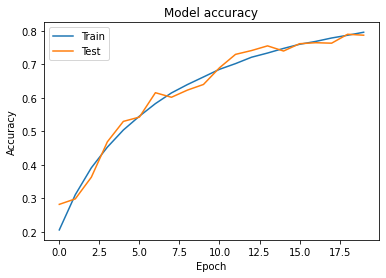

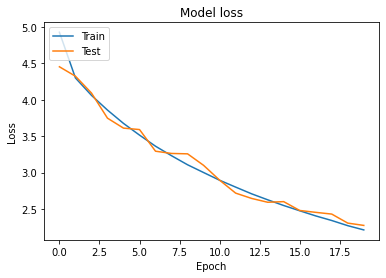

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 绘制训练 & 验证的损失值
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()